+ Models in this file are listed below
    + 1). TBATS Model
    + 2). Prophet Model
    + 3). Auto Ensemble Model(in it we have used Exponential Smoothing Model and Prophet Model)

In [1]:
import shutup
shutup.please()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Extract Data from yfinance
import yfinance as yf
import datetime as dttm

startDate = dttm.datetime(2011, 1, 1)
endDate = dttm.datetime(2022, 7, 1)

GetData = yf.Ticker("NESTLEIND.NS")
# print(GetData.history(start=startDate, end=endDate))

yf_data = pd.DataFrame(GetData.history(start=startDate, end=endDate))
yf_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,3315.501470,3334.762117,3282.076157,3313.040039,5256,0.0,0
2011-01-04,3312.306385,3368.360717,3282.076731,3361.192139,21916,0.0,0
2011-01-05,3345.991030,3398.633773,3330.876202,3369.267822,32381,0.0,0
2011-01-06,3368.447706,3410.769229,3286.395775,3311.270508,16829,0.0,0
2011-01-07,3290.713064,3342.535317,3257.892303,3273.395752,30854,0.0,0


In [4]:
numeric_columns = list(yf_data.select_dtypes(['float','int']).columns)
numeric_columns

['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

In [5]:
numeric_columns.sort()
numeric_columns

['Close', 'Dividends', 'High', 'Low', 'Open', 'Stock Splits', 'Volume']

In [6]:
data = yf_data.copy()
data = data.asfreq('B')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,3315.501470,3334.762117,3282.076157,3313.040039,5256.0,0.0,0.0
2011-01-04,3312.306385,3368.360717,3282.076731,3361.192139,21916.0,0.0,0.0
2011-01-05,3345.991030,3398.633773,3330.876202,3369.267822,32381.0,0.0,0.0
2011-01-06,3368.447706,3410.769229,3286.395775,3311.270508,16829.0,0.0,0.0
2011-01-07,3290.713064,3342.535317,3257.892303,3273.395752,30854.0,0.0,0.0


In [7]:
data.shape

(2999, 7)

In [8]:
data.ffill(inplace=True)

In [9]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [10]:
final_data = pd.DataFrame(data.Close)
final_data.head()

,Close
Date,
2011-01-03,3313.040039
2011-01-04,3361.192139
2011-01-05,3369.267822
2011-01-06,3311.270508
2011-01-07,3273.395752


In [11]:
final_data['2020-01-01':'2022-06-30'].count()

Close    652
dtype: int64

In [12]:
train_data = final_data.iloc[:len(final_data)-652] 
test_data = final_data.iloc[len(final_data)-652:]
train_data.shape, test_data.shape

((2347, 1), (652, 1))

In [13]:
test_data, train_data

(                   Close
 Date                    
 2020-01-01  14215.091797
 2020-01-02  14167.288086
 2020-01-03  14036.719727
 2020-01-06  13866.522461
 2020-01-07  13745.424805
 ...                  ...
 2022-06-24  17231.650391
 2022-06-27  17358.250000
 2022-06-28  17403.900391
 2022-06-29  17499.050781
 2022-06-30  17470.000000
 
 [652 rows x 1 columns],
                    Close
 Date                    
 2011-01-03   3313.040039
 2011-01-04   3361.192139
 2011-01-05   3369.267822
 2011-01-06   3311.270508
 2011-01-07   3273.395752
 ...                  ...
 2019-12-25  14029.408203
 2019-12-26  14042.151367
 2019-12-27  14104.576172
 2019-12-30  14285.161133
 2019-12-31  14221.151367
 
 [2347 rows x 1 columns])

In [14]:
from sklearn.metrics import mean_squared_error

def error(data1, data2):
    mse = mean_squared_error(data1, data2)
    rmse = np.sqrt(mse)
    
    print('Errors :-')
    print('MSE : ',mse)
    print('RMSE : ',rmse,'\n')
    return mse, rmse

In [15]:
import plotly.io as pio
# For interactive graph Uncomment " pio.renderers.default = 'notebook' " and and comment " pio.renderers.default = 'png' "
# And then rerun the file on Jupyter Notebook


# pio.renderers.default = 'notebook'
pio.renderers.default = 'png'

# TBATS Model

In [16]:
from sktime.forecasting.tbats import TBATS

In [17]:
model = TBATS(use_box_cox=False, use_trend=True, use_damped_trend=False, sp=[253,20], use_arma_errors=True,
              show_warnings=False,n_jobs=-1)

model.fit(train_data)

TBATS(n_jobs=-1, show_warnings=False, sp=[253, 20], use_box_cox=False,
      use_damped_trend=False, use_trend=True)

In [18]:
fh = list(range(1,653))
# fh

In [19]:
test_predictions = model.predict(fh = fh)
test_predictions

,Close
2020-01-01,14235.951750
2020-01-02,14248.106732
2020-01-03,14260.261713
2020-01-06,14272.416695
2020-01-07,14284.571677
...,...
2022-06-24,22100.224833
2022-06-27,22112.379815
2022-06-28,22124.534796
2022-06-29,22136.689778


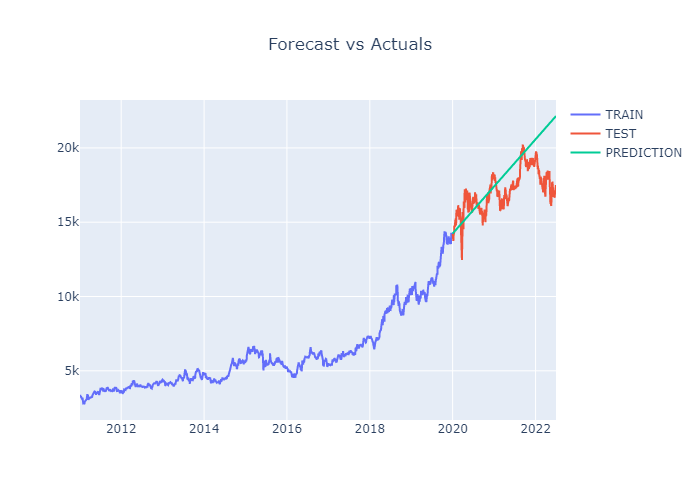

In [20]:
import plotly.offline as py
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions['Close'], mode='lines', name='PREDICTION'))

fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
fig.show()

# Prophet Model

In [21]:
from sktime.forecasting.fbprophet import Prophet
import holidays

In [22]:
holiday = pd.DataFrame([])

for date, name in sorted(holidays.India(years=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "India_Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

In [23]:
holiday = holiday[:-4]

In [24]:
seasonality = {'name':'yearly', 'period':253, 'fourier_order': 10, 'mode': 'multiplicative'}

In [25]:
fmodel = Prophet()
fmodel.fit(train_data)
fh = list(range(1,653))
test_predictions = fmodel.predict(fh=fh)

17:33:01 - cmdstanpy - INFO - Chain [1] start processing
17:33:02 - cmdstanpy - INFO - Chain [1] done processing


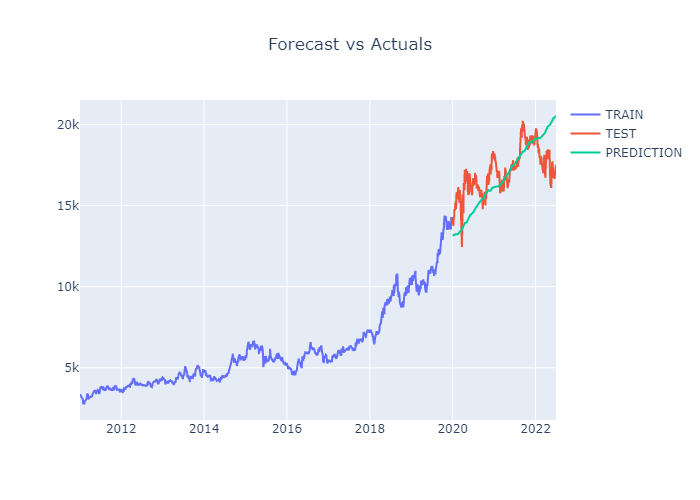

In [26]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions['yhat'], mode='lines', name='PREDICTION'))

fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
fig.show()

In [27]:
error(test_data['Close'],test_predictions)

Errors :-
MSE :  2339920.647195863
RMSE :  1529.6799165825062 



(2339920.647195863, 1529.6799165825062)

In [28]:
model = Prophet(freq='B', add_seasonality=None, seasonality_mode='multiplicative', n_changepoints=int((len(train_data))/12), 
                seasonality_prior_scale=10.0, add_country_holidays={'country_name': 'India'}, verbose=10,
                holidays=holiday,
                yearly_seasonality=True, weekly_seasonality=False , daily_seasonality=False)
model.fit(train_data)

17:33:05 - cmdstanpy - INFO - Chain [1] start processing
17:33:24 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_country_holidays={'country_name': 'India'}, daily_seasonality=False,
        freq='B',
        holidays=           ds         holiday
0  2011-01-14  India_Holidays
1  2011-01-26  India_Holidays
2  2011-03-19  India_Holidays
3  2011-05-01  India_Holidays
4  2011-08-15  India_Holidays
..        ...             ...
87 2021-12-25  India_Holidays
88 2022-01-14  India_Holidays
89 2022-01-26  India_Holidays
90 2022-03-18  India_Holidays
91 2022-05-01  India_Holidays

[92 rows x 2 columns],
        n_changepoints=195, seasonality_mode='multiplicative', verbose=10,
        weekly_seasonality=False, yearly_seasonality=True)

In [29]:
fh = list(range(1,653))
test_predictions = model.predict(fh=fh)
test_predictions

,yhat
2020-01-01,13200.098580
2020-01-02,13167.585208
2020-01-03,13153.913376
2020-01-06,13121.499279
2020-01-07,13114.038580
...,...
2022-06-24,20002.112571
2022-06-27,20032.687045
2022-06-28,20045.873475
2022-06-29,20060.349425


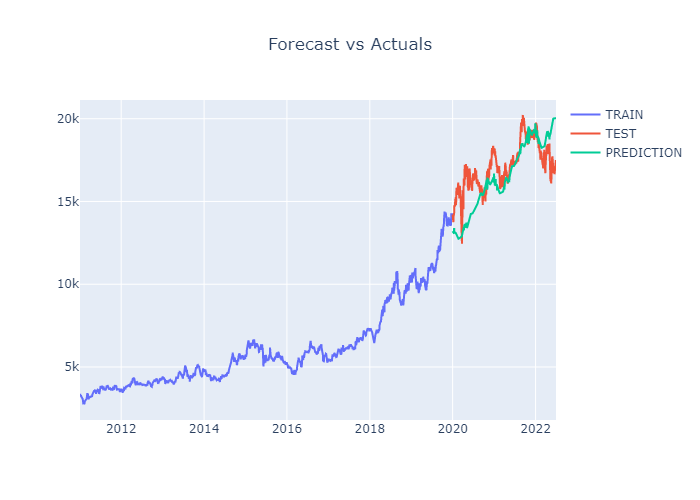

In [30]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions['yhat'], mode='lines', name='PREDICTION'))

fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
fig.show()

In [31]:
error(test_data['Close'],test_predictions)

Errors :-
MSE :  2240308.0721597727
RMSE :  1496.7658708561512 



(2240308.0721597727, 1496.7658708561512)

### Hyperparameter Tunning 

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

In [33]:
from sklearn.model_selection import ParameterGrid
params_grid = {'changepoint_prior_scale':[0.05,1,10,25],
               'n_changepoints' : [1,10,25,100],
               'seasonality_prior_scale':[0.05,1,10,25]}

grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 64


In [34]:
model_parameters = pd.DataFrame(columns = ['Parameters','MSE','RMSE'])
i = 1
for p in grid:
    test = pd.DataFrame()
    print(i,' ',p)
    i = i+1
    random.seed(0)
    train_model =Prophet(freq='B', 
                         changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = 'multiplicative',
                         seasonality_prior_scale=p['seasonality_prior_scale'],
                         weekly_seasonality=False,
                         daily_seasonality = False,
                         yearly_seasonality = True,
                         add_country_holidays={'country_name': 'India'}, holidays=holiday)
    train_model.fit(train_data)
    fh = list(range(1,653))
    test_predictions = train_model.predict(fh=fh)
    mse, rmse = error(test_data['Close'],test_predictions)
    print('Root Mean Squre Error(RMSE)------------------------------------',rmse)
    model_parameters = model_parameters.append({'Parameters':p, 'MSE':mse, 'RMSE':rmse},ignore_index=True)

1   {'changepoint_prior_scale': 0.05, 'n_changepoints': 1, 'seasonality_prior_scale': 0.05}


17:33:30 - cmdstanpy - INFO - Chain [1] start processing
17:33:31 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4119159.5540196323
RMSE :  2029.5712734515218 

Root Mean Squre Error(RMSE)------------------------------------ 2029.5712734515218
2   {'changepoint_prior_scale': 0.05, 'n_changepoints': 1, 'seasonality_prior_scale': 1}


17:33:33 - cmdstanpy - INFO - Chain [1] start processing
17:33:33 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4116624.750319598
RMSE :  2028.9467095810076 

Root Mean Squre Error(RMSE)------------------------------------ 2028.9467095810076
3   {'changepoint_prior_scale': 0.05, 'n_changepoints': 1, 'seasonality_prior_scale': 10}


17:33:35 - cmdstanpy - INFO - Chain [1] start processing
17:33:35 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4116790.4389524693
RMSE :  2028.9875403640283 

Root Mean Squre Error(RMSE)------------------------------------ 2028.9875403640283
4   {'changepoint_prior_scale': 0.05, 'n_changepoints': 1, 'seasonality_prior_scale': 25}


17:33:37 - cmdstanpy - INFO - Chain [1] start processing
17:33:37 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4115214.8157067033
RMSE :  2028.5992250088984 

Root Mean Squre Error(RMSE)------------------------------------ 2028.5992250088984
5   {'changepoint_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_prior_scale': 0.05}


17:33:39 - cmdstanpy - INFO - Chain [1] start processing
17:33:40 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2228517.367926282
RMSE :  1492.8219478311141 

Root Mean Squre Error(RMSE)------------------------------------ 1492.8219478311141
6   {'changepoint_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_prior_scale': 1}


17:33:42 - cmdstanpy - INFO - Chain [1] start processing
17:33:42 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2228193.8889211966
RMSE :  1492.7135990943461 

Root Mean Squre Error(RMSE)------------------------------------ 1492.7135990943461
7   {'changepoint_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_prior_scale': 10}


17:33:45 - cmdstanpy - INFO - Chain [1] start processing
17:33:45 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2230922.352449417
RMSE :  1493.627246822117 

Root Mean Squre Error(RMSE)------------------------------------ 1493.627246822117
8   {'changepoint_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_prior_scale': 25}


17:33:48 - cmdstanpy - INFO - Chain [1] start processing
17:33:48 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2231048.9712915123
RMSE :  1493.6696325799464 

Root Mean Squre Error(RMSE)------------------------------------ 1493.6696325799464
9   {'changepoint_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_prior_scale': 0.05}


17:33:51 - cmdstanpy - INFO - Chain [1] start processing
17:33:52 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2237284.0821194653
RMSE :  1495.7553550361988 

Root Mean Squre Error(RMSE)------------------------------------ 1495.7553550361988
10   {'changepoint_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_prior_scale': 1}


17:33:55 - cmdstanpy - INFO - Chain [1] start processing
17:33:56 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2235751.7780182776
RMSE :  1495.243049814403 

Root Mean Squre Error(RMSE)------------------------------------ 1495.243049814403
11   {'changepoint_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_prior_scale': 10}


17:33:59 - cmdstanpy - INFO - Chain [1] start processing
17:34:00 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2239231.0810362073
RMSE :  1496.4060548648577 

Root Mean Squre Error(RMSE)------------------------------------ 1496.4060548648577
12   {'changepoint_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_prior_scale': 25}


17:34:03 - cmdstanpy - INFO - Chain [1] start processing
17:34:05 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2237375.516124328
RMSE :  1495.7859192158242 

Root Mean Squre Error(RMSE)------------------------------------ 1495.7859192158242
13   {'changepoint_prior_scale': 0.05, 'n_changepoints': 100, 'seasonality_prior_scale': 0.05}


17:34:07 - cmdstanpy - INFO - Chain [1] start processing
17:34:17 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2245309.169434218
RMSE :  1498.4355740018382 

Root Mean Squre Error(RMSE)------------------------------------ 1498.4355740018382
14   {'changepoint_prior_scale': 0.05, 'n_changepoints': 100, 'seasonality_prior_scale': 1}


17:34:21 - cmdstanpy - INFO - Chain [1] start processing
17:34:33 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2242136.495136371
RMSE :  1497.376537527008 

Root Mean Squre Error(RMSE)------------------------------------ 1497.376537527008
15   {'changepoint_prior_scale': 0.05, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


17:34:38 - cmdstanpy - INFO - Chain [1] start processing
17:34:46 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2241957.578180682
RMSE :  1497.316792860042 

Root Mean Squre Error(RMSE)------------------------------------ 1497.316792860042
16   {'changepoint_prior_scale': 0.05, 'n_changepoints': 100, 'seasonality_prior_scale': 25}


17:34:50 - cmdstanpy - INFO - Chain [1] start processing
17:35:03 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2243556.2250931957
RMSE :  1497.8505349644188 

Root Mean Squre Error(RMSE)------------------------------------ 1497.8505349644188
17   {'changepoint_prior_scale': 1, 'n_changepoints': 1, 'seasonality_prior_scale': 0.05}


17:35:07 - cmdstanpy - INFO - Chain [1] start processing
17:35:07 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4203074.028529946
RMSE :  2050.140002177887 

Root Mean Squre Error(RMSE)------------------------------------ 2050.140002177887
18   {'changepoint_prior_scale': 1, 'n_changepoints': 1, 'seasonality_prior_scale': 1}


17:35:10 - cmdstanpy - INFO - Chain [1] start processing
17:35:10 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4197223.732297776
RMSE :  2048.7127012584697 

Root Mean Squre Error(RMSE)------------------------------------ 2048.7127012584697
19   {'changepoint_prior_scale': 1, 'n_changepoints': 1, 'seasonality_prior_scale': 10}


17:35:13 - cmdstanpy - INFO - Chain [1] start processing
17:35:13 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4197124.63931913
RMSE :  2048.6885169100574 

Root Mean Squre Error(RMSE)------------------------------------ 2048.6885169100574
20   {'changepoint_prior_scale': 1, 'n_changepoints': 1, 'seasonality_prior_scale': 25}


17:35:16 - cmdstanpy - INFO - Chain [1] start processing
17:35:16 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4196858.486881106
RMSE :  2048.623559095498 

Root Mean Squre Error(RMSE)------------------------------------ 2048.623559095498
21   {'changepoint_prior_scale': 1, 'n_changepoints': 10, 'seasonality_prior_scale': 0.05}


17:35:18 - cmdstanpy - INFO - Chain [1] start processing
17:35:18 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2220258.681944285
RMSE :  1490.0532480231318 

Root Mean Squre Error(RMSE)------------------------------------ 1490.0532480231318
22   {'changepoint_prior_scale': 1, 'n_changepoints': 10, 'seasonality_prior_scale': 1}


17:35:21 - cmdstanpy - INFO - Chain [1] start processing
17:35:22 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2219715.3197283098
RMSE :  1489.8709070682298 

Root Mean Squre Error(RMSE)------------------------------------ 1489.8709070682298
23   {'changepoint_prior_scale': 1, 'n_changepoints': 10, 'seasonality_prior_scale': 10}


17:35:25 - cmdstanpy - INFO - Chain [1] start processing
17:35:26 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2219764.12888589
RMSE :  1489.8872873093085 

Root Mean Squre Error(RMSE)------------------------------------ 1489.8872873093085
24   {'changepoint_prior_scale': 1, 'n_changepoints': 10, 'seasonality_prior_scale': 25}


17:35:29 - cmdstanpy - INFO - Chain [1] start processing
17:35:29 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2220043.6961492463
RMSE :  1489.9811059705578 

Root Mean Squre Error(RMSE)------------------------------------ 1489.9811059705578
25   {'changepoint_prior_scale': 1, 'n_changepoints': 25, 'seasonality_prior_scale': 0.05}


17:35:32 - cmdstanpy - INFO - Chain [1] start processing
17:35:36 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2426366.0671243696
RMSE :  1557.6797062054732 

Root Mean Squre Error(RMSE)------------------------------------ 1557.6797062054732
26   {'changepoint_prior_scale': 1, 'n_changepoints': 25, 'seasonality_prior_scale': 1}


17:35:39 - cmdstanpy - INFO - Chain [1] start processing
17:35:41 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2422610.1671106485
RMSE :  1556.4736319997999 

Root Mean Squre Error(RMSE)------------------------------------ 1556.4736319997999
27   {'changepoint_prior_scale': 1, 'n_changepoints': 25, 'seasonality_prior_scale': 10}


17:35:44 - cmdstanpy - INFO - Chain [1] start processing
17:35:47 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2420357.0560415364
RMSE :  1555.7496765358933 

Root Mean Squre Error(RMSE)------------------------------------ 1555.7496765358933
28   {'changepoint_prior_scale': 1, 'n_changepoints': 25, 'seasonality_prior_scale': 25}


17:35:51 - cmdstanpy - INFO - Chain [1] start processing
17:35:57 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2428232.810567964
RMSE :  1558.2787974454263 

Root Mean Squre Error(RMSE)------------------------------------ 1558.2787974454263
29   {'changepoint_prior_scale': 1, 'n_changepoints': 100, 'seasonality_prior_scale': 0.05}


17:36:01 - cmdstanpy - INFO - Chain [1] start processing
17:36:18 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2651313.089708919
RMSE :  1628.285321959551 

Root Mean Squre Error(RMSE)------------------------------------ 1628.285321959551
30   {'changepoint_prior_scale': 1, 'n_changepoints': 100, 'seasonality_prior_scale': 1}


17:36:22 - cmdstanpy - INFO - Chain [1] start processing
17:36:44 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2680509.4441741444
RMSE :  1637.2261432600399 

Root Mean Squre Error(RMSE)------------------------------------ 1637.2261432600399
31   {'changepoint_prior_scale': 1, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


17:36:49 - cmdstanpy - INFO - Chain [1] start processing
17:37:13 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2674477.286729586
RMSE :  1635.3829174629366 

Root Mean Squre Error(RMSE)------------------------------------ 1635.3829174629366
32   {'changepoint_prior_scale': 1, 'n_changepoints': 100, 'seasonality_prior_scale': 25}


17:37:17 - cmdstanpy - INFO - Chain [1] start processing
17:37:53 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2666803.909708551
RMSE :  1633.03518324271 

Root Mean Squre Error(RMSE)------------------------------------ 1633.03518324271
33   {'changepoint_prior_scale': 10, 'n_changepoints': 1, 'seasonality_prior_scale': 0.05}


17:37:58 - cmdstanpy - INFO - Chain [1] start processing
17:37:58 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4202406.183892291
RMSE :  2049.977117894805 

Root Mean Squre Error(RMSE)------------------------------------ 2049.977117894805
34   {'changepoint_prior_scale': 10, 'n_changepoints': 1, 'seasonality_prior_scale': 1}


17:38:00 - cmdstanpy - INFO - Chain [1] start processing
17:38:01 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4201436.733778423
RMSE :  2049.740650369803 

Root Mean Squre Error(RMSE)------------------------------------ 2049.740650369803
35   {'changepoint_prior_scale': 10, 'n_changepoints': 1, 'seasonality_prior_scale': 10}


17:38:03 - cmdstanpy - INFO - Chain [1] start processing
17:38:04 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4202810.17498534
RMSE :  2050.0756510395754 

Root Mean Squre Error(RMSE)------------------------------------ 2050.0756510395754
36   {'changepoint_prior_scale': 10, 'n_changepoints': 1, 'seasonality_prior_scale': 25}


17:38:06 - cmdstanpy - INFO - Chain [1] start processing
17:38:07 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4200607.37612372
RMSE :  2049.5383324358 

Root Mean Squre Error(RMSE)------------------------------------ 2049.5383324358
37   {'changepoint_prior_scale': 10, 'n_changepoints': 10, 'seasonality_prior_scale': 0.05}


17:38:09 - cmdstanpy - INFO - Chain [1] start processing
17:38:10 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2219245.755057298
RMSE :  1489.713313042915 

Root Mean Squre Error(RMSE)------------------------------------ 1489.713313042915
38   {'changepoint_prior_scale': 10, 'n_changepoints': 10, 'seasonality_prior_scale': 1}


17:38:13 - cmdstanpy - INFO - Chain [1] start processing
17:38:14 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2219195.1320109223
RMSE :  1489.6963220773964 

Root Mean Squre Error(RMSE)------------------------------------ 1489.6963220773964
39   {'changepoint_prior_scale': 10, 'n_changepoints': 10, 'seasonality_prior_scale': 10}


17:38:17 - cmdstanpy - INFO - Chain [1] start processing
17:38:17 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2219964.5544491606
RMSE :  1489.9545477796162 

Root Mean Squre Error(RMSE)------------------------------------ 1489.9545477796162
40   {'changepoint_prior_scale': 10, 'n_changepoints': 10, 'seasonality_prior_scale': 25}


17:38:19 - cmdstanpy - INFO - Chain [1] start processing
17:38:20 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2219915.064260998
RMSE :  1489.9379397347386 

Root Mean Squre Error(RMSE)------------------------------------ 1489.9379397347386
41   {'changepoint_prior_scale': 10, 'n_changepoints': 25, 'seasonality_prior_scale': 0.05}


17:38:22 - cmdstanpy - INFO - Chain [1] start processing
17:38:27 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2458538.3713540523
RMSE :  1567.9726947093347 

Root Mean Squre Error(RMSE)------------------------------------ 1567.9726947093347
42   {'changepoint_prior_scale': 10, 'n_changepoints': 25, 'seasonality_prior_scale': 1}


17:38:30 - cmdstanpy - INFO - Chain [1] start processing
17:38:36 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2459908.1115725255
RMSE :  1568.4094209014831 

Root Mean Squre Error(RMSE)------------------------------------ 1568.4094209014831
43   {'changepoint_prior_scale': 10, 'n_changepoints': 25, 'seasonality_prior_scale': 10}


17:38:39 - cmdstanpy - INFO - Chain [1] start processing
17:38:43 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2451582.5606371635
RMSE :  1565.7530330921168 

Root Mean Squre Error(RMSE)------------------------------------ 1565.7530330921168
44   {'changepoint_prior_scale': 10, 'n_changepoints': 25, 'seasonality_prior_scale': 25}


17:38:47 - cmdstanpy - INFO - Chain [1] start processing
17:38:49 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2461738.987086275
RMSE :  1568.9929850341189 

Root Mean Squre Error(RMSE)------------------------------------ 1568.9929850341189
45   {'changepoint_prior_scale': 10, 'n_changepoints': 100, 'seasonality_prior_scale': 0.05}


17:38:52 - cmdstanpy - INFO - Chain [1] start processing
17:39:30 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2703561.5869099693
RMSE :  1644.2510717375158 

Root Mean Squre Error(RMSE)------------------------------------ 1644.2510717375158
46   {'changepoint_prior_scale': 10, 'n_changepoints': 100, 'seasonality_prior_scale': 1}


17:39:34 - cmdstanpy - INFO - Chain [1] start processing
17:39:56 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2715586.3998398557
RMSE :  1647.9036379108627 

Root Mean Squre Error(RMSE)------------------------------------ 1647.9036379108627
47   {'changepoint_prior_scale': 10, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


17:40:00 - cmdstanpy - INFO - Chain [1] start processing
17:40:27 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2720229.755184425
RMSE :  1649.311903547787 

Root Mean Squre Error(RMSE)------------------------------------ 1649.311903547787
48   {'changepoint_prior_scale': 10, 'n_changepoints': 100, 'seasonality_prior_scale': 25}


17:40:31 - cmdstanpy - INFO - Chain [1] start processing
17:41:09 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2706400.0780476024
RMSE :  1645.114001535335 

Root Mean Squre Error(RMSE)------------------------------------ 1645.114001535335
49   {'changepoint_prior_scale': 25, 'n_changepoints': 1, 'seasonality_prior_scale': 0.05}


17:41:12 - cmdstanpy - INFO - Chain [1] start processing
17:41:13 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4204104.033952986
RMSE :  2050.391190469025 

Root Mean Squre Error(RMSE)------------------------------------ 2050.391190469025
50   {'changepoint_prior_scale': 25, 'n_changepoints': 1, 'seasonality_prior_scale': 1}


17:41:15 - cmdstanpy - INFO - Chain [1] start processing
17:41:16 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4203386.505462946
RMSE :  2050.21620944303 

Root Mean Squre Error(RMSE)------------------------------------ 2050.21620944303
51   {'changepoint_prior_scale': 25, 'n_changepoints': 1, 'seasonality_prior_scale': 10}


17:41:18 - cmdstanpy - INFO - Chain [1] start processing
17:41:18 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4202822.082716894
RMSE :  2050.0785552551138 

Root Mean Squre Error(RMSE)------------------------------------ 2050.0785552551138
52   {'changepoint_prior_scale': 25, 'n_changepoints': 1, 'seasonality_prior_scale': 25}


17:41:21 - cmdstanpy - INFO - Chain [1] start processing
17:41:21 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  4198755.3238725
RMSE :  2049.086460809426 

Root Mean Squre Error(RMSE)------------------------------------ 2049.086460809426
53   {'changepoint_prior_scale': 25, 'n_changepoints': 10, 'seasonality_prior_scale': 0.05}


17:41:24 - cmdstanpy - INFO - Chain [1] start processing
17:41:25 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2219323.6598545336
RMSE :  1489.7394603938415 

Root Mean Squre Error(RMSE)------------------------------------ 1489.7394603938415
54   {'changepoint_prior_scale': 25, 'n_changepoints': 10, 'seasonality_prior_scale': 1}


17:41:28 - cmdstanpy - INFO - Chain [1] start processing
17:41:29 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2219972.2322972617
RMSE :  1489.9571243150797 

Root Mean Squre Error(RMSE)------------------------------------ 1489.9571243150797
55   {'changepoint_prior_scale': 25, 'n_changepoints': 10, 'seasonality_prior_scale': 10}


17:41:31 - cmdstanpy - INFO - Chain [1] start processing
17:41:32 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2219821.8237598715
RMSE :  1489.9066493441364 

Root Mean Squre Error(RMSE)------------------------------------ 1489.9066493441364
56   {'changepoint_prior_scale': 25, 'n_changepoints': 10, 'seasonality_prior_scale': 25}


17:41:34 - cmdstanpy - INFO - Chain [1] start processing
17:41:35 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2219699.507097919
RMSE :  1489.8656003471988 

Root Mean Squre Error(RMSE)------------------------------------ 1489.8656003471988
57   {'changepoint_prior_scale': 25, 'n_changepoints': 25, 'seasonality_prior_scale': 0.05}


17:41:37 - cmdstanpy - INFO - Chain [1] start processing
17:41:41 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2465208.30051232
RMSE :  1570.0981818065773 

Root Mean Squre Error(RMSE)------------------------------------ 1570.0981818065773
58   {'changepoint_prior_scale': 25, 'n_changepoints': 25, 'seasonality_prior_scale': 1}


17:41:45 - cmdstanpy - INFO - Chain [1] start processing
17:41:54 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2453548.027703613
RMSE :  1566.3805500910732 

Root Mean Squre Error(RMSE)------------------------------------ 1566.3805500910732
59   {'changepoint_prior_scale': 25, 'n_changepoints': 25, 'seasonality_prior_scale': 10}


17:41:58 - cmdstanpy - INFO - Chain [1] start processing
17:42:03 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2467684.025171195
RMSE :  1570.8863820057754 

Root Mean Squre Error(RMSE)------------------------------------ 1570.8863820057754
60   {'changepoint_prior_scale': 25, 'n_changepoints': 25, 'seasonality_prior_scale': 25}


17:42:06 - cmdstanpy - INFO - Chain [1] start processing
17:42:08 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2445182.055813292
RMSE :  1563.7077910572973 

Root Mean Squre Error(RMSE)------------------------------------ 1563.7077910572973
61   {'changepoint_prior_scale': 25, 'n_changepoints': 100, 'seasonality_prior_scale': 0.05}


17:42:11 - cmdstanpy - INFO - Chain [1] start processing
17:42:58 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2731729.092942254
RMSE :  1652.794328687709 

Root Mean Squre Error(RMSE)------------------------------------ 1652.794328687709
62   {'changepoint_prior_scale': 25, 'n_changepoints': 100, 'seasonality_prior_scale': 1}


17:43:03 - cmdstanpy - INFO - Chain [1] start processing
17:43:33 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2726391.7178658443
RMSE :  1651.1788873001751 

Root Mean Squre Error(RMSE)------------------------------------ 1651.1788873001751
63   {'changepoint_prior_scale': 25, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


17:43:37 - cmdstanpy - INFO - Chain [1] start processing
17:43:58 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2719379.302613393
RMSE :  1649.0540629747081 

Root Mean Squre Error(RMSE)------------------------------------ 1649.0540629747081
64   {'changepoint_prior_scale': 25, 'n_changepoints': 100, 'seasonality_prior_scale': 25}


17:44:02 - cmdstanpy - INFO - Chain [1] start processing
17:44:23 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2737888.2375832293
RMSE :  1654.6565316050426 

Root Mean Squre Error(RMSE)------------------------------------ 1654.6565316050426


In [35]:
parameters = model_parameters.sort_values(by=['RMSE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,Parameters,MSE,RMSE
0,"{'changepoint_prior_scale': 10, 'n_changepoint...",2.219195e+06,1489.696322
1,"{'changepoint_prior_scale': 10, 'n_changepoint...",2.219246e+06,1489.713313
2,"{'changepoint_prior_scale': 25, 'n_changepoint...",2.219324e+06,1489.739460
3,"{'changepoint_prior_scale': 25, 'n_changepoint...",2.219700e+06,1489.865600
4,"{'changepoint_prior_scale': 1, 'n_changepoints...",2.219715e+06,1489.870907


In [36]:
parameters['Parameters'][0]['changepoint_prior_scale']

10

In [37]:
Pro_model = Prophet(freq='B', seasonality_mode='multiplicative', 
                    changepoint_prior_scale=parameters['Parameters'][0]['changepoint_prior_scale'], 
                    n_changepoints=parameters['Parameters'][0]['n_changepoints'], 
                    seasonality_prior_scale=parameters['Parameters'][0]['seasonality_prior_scale'], 
                    add_country_holidays={'country_name': 'India'}, verbose=10,
                holidays=holiday,
                yearly_seasonality=True, weekly_seasonality=False , daily_seasonality=False)
Pro_model.fit(train_data)

17:44:27 - cmdstanpy - INFO - Chain [1] start processing
17:44:27 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_country_holidays={'country_name': 'India'},
        changepoint_prior_scale=10, daily_seasonality=False, freq='B',
        holidays=           ds         holiday
0  2011-01-14  India_Holidays
1  2011-01-26  India_Holidays
2  2011-03-19  India_Holidays
3  2011-05-01  India_Holidays
4  2011-08-15  India_Holidays
..        ...             ...
87 2021-12-25  India_Holidays
88 2022-01-14  India_Holidays
89 2022-01-26  India_Holidays
90 2022-03-18  India_Holidays
91 2022-05-01  India_Holidays

[92 rows x 2 columns],
        n_changepoints=10, seasonality_mode='multiplicative',
        seasonality_prior_scale=1, verbose=10, weekly_seasonality=False,
        yearly_seasonality=True)

In [38]:
fh = list(range(1,653))
# fh1 = pd.DatetimeIndex(np.array(test_data.index))
# fh1
test_predictions_pro = Pro_model.predict(fh=fh)
test_predictions_pro

,yhat
2020-01-01,13267.866741
2020-01-02,13180.077922
2020-01-03,13168.514052
2020-01-06,13142.604968
2020-01-07,13137.314645
...,...
2022-06-24,20104.775714
2022-06-27,20138.732911
2022-06-28,20152.672254
2022-06-29,20167.707001


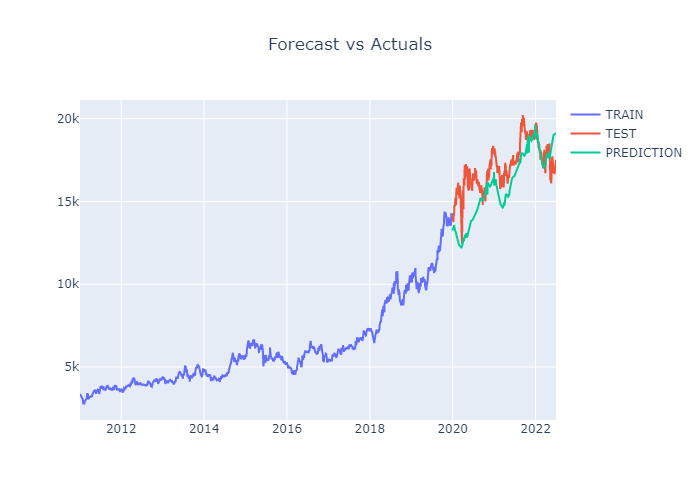

In [39]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions['yhat'], mode='lines', name='PREDICTION'))

fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
fig.show()

In [40]:
error(test_data['Close'],test_predictions_pro)

Errors :-
MSE :  2219195.1320109223
RMSE :  1489.6963220773964 



(2219195.1320109223, 1489.6963220773964)

# Auto Ensemble Forecaster

In [41]:
from sktime.forecasting.compose import AutoEnsembleForecaster

In [42]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.fbprophet import Prophet

In [43]:
Expo_model = ExponentialSmoothing(trend='add',seasonal='mul',sp=253, damped_trend=False)
# Expo_model.fit(train_data)

In [44]:
Pro_model = Prophet(freq='B', seasonality_mode='multiplicative', 
                    changepoint_prior_scale=parameters['Parameters'][0]['changepoint_prior_scale'], 
                    n_changepoints=parameters['Parameters'][0]['n_changepoints'], 
                    seasonality_prior_scale=parameters['Parameters'][0]['seasonality_prior_scale'], 
                    add_country_holidays={'country_name': 'India'}, verbose=10,
                    holidays=holiday,
                    yearly_seasonality=True, weekly_seasonality=False , daily_seasonality=False)
# Pro_model.fit(train_data)

In [45]:
forecasters = [
    ("prophet" , Pro_model),
    ("expo" , Expo_model)
]

In [46]:
Ensmodel = AutoEnsembleForecaster(forecasters=forecasters, n_jobs=-1, random_state=42)
Ensmodel.fit(train_data)

AutoEnsembleForecaster(forecasters=[('prophet',
                                     Prophet(add_country_holidays={'country_name': 'India'},
                                             changepoint_prior_scale=10,
                                             daily_seasonality=False, freq='B',
                                             holidays=           ds         holiday
0  2011-01-14  India_Holidays
1  2011-01-26  India_Holidays
2  2011-03-19  India_Holidays
3  2011-05-01  India_Holidays
4  2011-08-15  India_Holidays
..        ...             ...
87 2021-12-25  India_Holidays
88 2022-01-14  India_Holidays
89 2022-01-26  India_Holidays
90 2022-03-18  India_Holidays
91 2022-05-01  India_Holidays

[92 rows x 2 columns],
                                             n_changepoints=10,
                                             seasonality_mode='multiplicative',
                                             seasonality_prior_scale=1,
                                             verbose=10,
                                             weekly_seasonality=False,
                                             yearly_seasonality=True)),
                                    ('expo',
                                     ExponentialSmoothing(seasonal='mul',
                                                          sp=253,
                                                          trend='add'))],
                       n_jobs=-1, random_state=42)

In [47]:
fh = list(range(1,653))
# fh1 = pd.DatetimeIndex(np.array(test_data.index))
# fh1
test_predictionsEns = Ensmodel.predict(fh=fh)
test_predictionsEns

,Close
2020-01-01,13491.513821
2020-01-02,13430.689603
2020-01-03,13441.847802
2020-01-06,13414.706156
2020-01-07,13404.631396
...,...
2022-06-24,19096.081058
2022-06-27,19098.300677
2022-06-28,19133.634186
2022-06-29,19139.280756


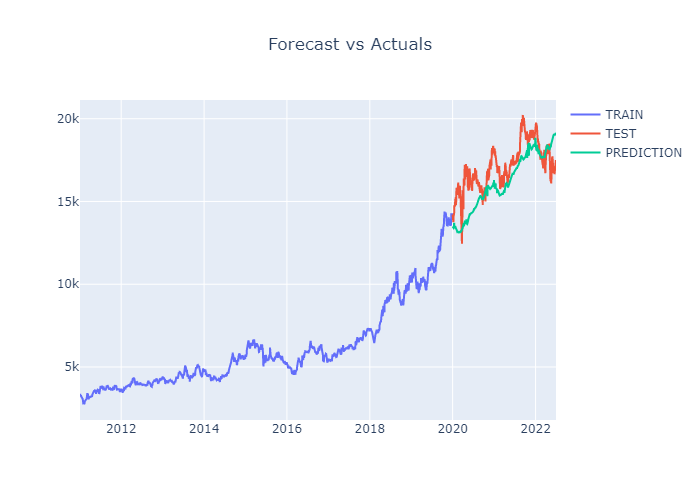

In [48]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictionsEns.index, y=test_predictionsEns['Close'], mode='lines', name='PREDICTION'))

fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
fig.show()

In [49]:
error(test_data['Close'],test_predictionsEns)

Errors :-
MSE :  2061669.8756665993
RMSE :  1435.8516203516988 



(2061669.8756665993, 1435.8516203516988)